# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement: 
We all have those significant moments in our lives such as getting our first car. However, as we get older more moments start to come where we actually become adults such as buying a house and starting a family. However, buying a house is a major financial commitment and there are many things to factor in when deciding on a property. Of course, money is the biggest factor as we have to have enough to buy a house, let alone our dream house. In an indeal world, we can all just buy a plot of land and build the house of our dreams with no worries. Sadly, we aren't in an ideal world. We live in an economy where buy houses in a supply and demand model. We need to give and take with the existing houses that are for sale, which means that we might have to sacrifice a pool for a garage. Ultimately, what determines the price of a house and whether we decide to sign? What should we be considering and prioritizing? Perhaps we can create something to help us predict the price of a house based on the features included. 

## Executive Summary: 
We took two datasets that listed a myriad of features (about 80) regarding a house such as square footage of the first floor, pool quality, and lot area. However, the only difference was sale price. One dataset had the sale price and one didn't so we took our training dataset (the one with the sale price) and based three regression models (Linear, Lasso, and Ridge) on that data to find how we can best predict sale price. 

Our process began with importing and cleaning our datasets as null values can really pull our data one way or another so imputing values was our primary goal when cleaning the datasets. After cleaning our datasets, we went into exploratory data analysis where we could visualize relationships between variables and determine what features may have a bigger impact on sale price than others. In addition, we wanted to take care of outliers to prevent our data from being skewed because of them and try to normalize our data. However, we didn't discard all of the outliers as we did want our models to be able to handle any strays in the testing dataset. Then we explored some feature engineering where we created new features that encompasses multiple features together such as total property area by combining all individual areas like basement area, garage area, pool area, and first floor area.  Afterwards, we wanted to convert our categorical data to numerical so we could use all of our data when creating models (as they don't work well with categorical variables). 

Once we have our master dataset that we can work with when fitting the data to our Linear Regression, Lasso Regression, and Ridge Regression. After fitting, predicting, and plotting our data for visualization, we can immediately see that all three models seem to do quite well in predicting sale prices with minimal variance. However, with any regression model, there is a major downfall of it being boundless; but, we fix this through winsorizing by creating an upper and lower boundary. With our metrics scores, we can proceed with a more in-depth analysis on which model does best. Finally, we finish with some outside research before making our conclusions as there may be some factors that are unique to Ames, Iowa that may affect sale price as well such as there being a state university. 

## Contents: 
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
    - [Handling Null Values](#Handling-Null-Values)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Visualization Notes](#Visualization-Notes)
    - [Dropping Outliers](#Dropping-Outliers)
- [Feature Engineering](#Feature-Engineering)
    - [Converting Categorical Data](#Converting-Categorical-Data)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Linear Regression Notes](#Linear-Regression-Notes)
- [Regularization](#Regularization)
    - [Scaling Data](#Scaling-Data)
    - [Ridge Regression](#Ridge-Regression)
    - [Ridge Notes](#Ridge-Notes)
    - [Lasso Regression](#Lasso-Regression)
    - [Lasso Notes](#Lasso-Notes)
- [Winsorizing Models](#Winsorizing-Models)
    - [Winsorize Linear Regression](#Winsorize-Linear-Regression)
    - [Winsorize Ridge Regression](#Winsorize-Ridge-Regression)    
    - [Winsorize Lasso Regression](#Winsorize-Lasso-Regression)
    - [Winsorized Regression Models Notes](#Winsorized-Regression-Models-Notes)
- [Model Scoring](#Model-Scoring)
    - [Linear Regression Scoring](#Linear-Regression-Scoring)
    - [Lasso Regression Scoring](#Lasso-Regression-Scoring)
    - [Ridge Regression Scoring](#Ridge-Regression-Scoring)
- [Outside Research](#Outside-Research)
- [Conclusion](#Conclusion)
    - [Prediction and Evaluation](#Prediction-and-Evaluation)
    - [Kaggle Predictions](#Kaggle-Predictions)
- [Sources](#Sources)

## Data Import and Cleaning

In [112]:
# Imports
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats.mstats import winsorize

#### 1. Read in data

In [113]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

#### 2. Data observations

In [114]:
train.shape

(2051, 81)

In [115]:
test.shape

(878, 80)

In [116]:
# See what the different column is between the two datasets
set(train) - set(test)

{'SalePrice'}

In [117]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [118]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [119]:
train.set_index('Id', inplace = True)

In [120]:
test.set_index('Id', inplace = True)

In [121]:
train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [122]:
test.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [123]:
# Check for null values 
train.isna().sum()[train.isna().sum() > 0].sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [124]:
test.isna().sum()[test.isna().sum() > 0].sort_values(ascending = False)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

---
According to `train.shape` we should get 2,051 values for each column. Here we get the columns with missing values and the number of missing values in each respective column. 

#### 3. Fix any errors
Missing values are dealt with based on the data type and information given by the data description. We look at the `value_counts` and the data dictionary for our datasets to impute the `NaN` values. 

In [125]:
# Check what type of data values are entered i.e. integers, strings, etc. 
train['Pool QC'].value_counts() 

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [126]:
# Based on data dictionary, fill in nan values with appropriate value
train['Pool QC'] = train['Pool QC'].replace({np.nan: 'No pool'})
test['Pool QC'] = test['Pool QC'].replace({np.nan: 'No pool'})

In [127]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [128]:
train['Misc Feature'] = train['Misc Feature'].replace({np.nan: 'No misc. features'})
test['Misc Feature'] = test['Misc Feature'].replace({np.nan: 'No misc. features'})

In [129]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [130]:
train['Alley'] = train['Alley'].replace({np.nan: 'No alley'})
test['Alley'] = test['Alley'].replace({np.nan: 'No alley'})

In [131]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [132]:
train['Fence'] = train['Fence'].replace({np.nan: 'No fence'})
test['Fence'] = test['Fence'].replace({np.nan: 'No fence'})

In [133]:
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [134]:
train['Fireplace Qu'] = train['Fireplace Qu'].replace({np.nan: 'No fireplace'})
test['Fireplace Qu'] = test['Fireplace Qu'].replace({np.nan: 'No fireplace'})

In [135]:
train['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [136]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(0.0)
test['Lot Frontage'] = test['Lot Frontage'].fillna(0.0)

In [137]:
train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [138]:
train['Garage Finish'] = train['Garage Finish'].replace({np.nan: 'No garage'})
test['Garage Finish'] = test['Garage Finish'].replace({np.nan: 'No garage'})

In [139]:
train['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [140]:
train['Garage Cond'] = train['Garage Cond'].replace({np.nan: 'No garage'})
test['Garage Cond'] = test['Garage Cond'].replace({np.nan: 'No garage'})

In [141]:
train['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [142]:
train['Garage Qual'] = train['Garage Qual'].replace({np.nan: 'No garage'})
test['Garage Qual'] = test['Garage Qual'].replace({np.nan: 'No garage'})

In [143]:
train['Garage Yr Blt'].value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1917.0      1
1919.0      1
1896.0      1
1895.0      1
1918.0      1
Name: Garage Yr Blt, Length: 100, dtype: int64

In [144]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0.0)
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(0.0)

In [145]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [146]:
train['Garage Type'] = train['Garage Type'].replace({np.nan: 'No garage'})
test['Garage Type'] = test['Garage Type'].replace({np.nan: 'No garage'})

In [147]:
train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [148]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].replace({np.nan: 'No basement'})
test['Bsmt Exposure'] = test['Bsmt Exposure'].replace({np.nan: 'No basement'})

In [149]:
train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [150]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].replace({np.nan: 'No basement'})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].replace({np.nan: 'No basement'})

In [151]:
train['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [152]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].replace({np.nan: 'No basement'})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].replace({np.nan: 'No basement'})

In [153]:
train['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [154]:
train['Bsmt Cond'] = train['Bsmt Cond'].replace({np.nan: 'No basement'})
test['Bsmt Cond'] = test['Bsmt Cond'].replace({np.nan: 'No basement'})

In [155]:
train['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [156]:
train['Bsmt Qual'] = train['Bsmt Qual'].replace({np.nan: 'No basement'})
test['Bsmt Qual'] = test['Bsmt Qual'].replace({np.nan: 'No basement'})

In [157]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [158]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].replace({np.nan: 'No masonry'})
test['Mas Vnr Type'] = test['Mas Vnr Type'].replace({np.nan: 'No masonry'})

In [159]:
train['Mas Vnr Area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [160]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0.0)
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0.0)

In [161]:
train['Bsmt Half Bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [162]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0.0)
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].fillna(0.0)

In [163]:
train['Bsmt Full Bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [164]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0.0)
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].fillna(0.0)

In [165]:
train['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [166]:
train['Garage Cars'] = train['Garage Cars'].fillna(0.0)
test['Garage Cars'] = test['Garage Cars'].fillna(0.0)

In [167]:
train['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64

In [168]:
train['Garage Area'] = train['Garage Area'].fillna(0.0)
test['Garage Area'] = test['Garage Area'].fillna(0.0)

In [169]:
train['Bsmt Unf SF'].value_counts()

0.0       165
384.0      14
672.0      11
728.0      10
816.0       9
         ... 
494.0       1
1323.0      1
1041.0      1
314.0       1
2062.0      1
Name: Bsmt Unf SF, Length: 967, dtype: int64

In [170]:
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0.0)
test['Bsmt Unf SF'] = test['Bsmt Unf SF'].fillna(0.0)

In [171]:
train['BsmtFin SF 2'].value_counts()

0.0      1803
294.0       5
162.0       3
539.0       3
72.0        3
         ... 
712.0       1
529.0       1
215.0       1
252.0       1
823.0       1
Name: BsmtFin SF 2, Length: 205, dtype: int64

In [172]:
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0.0)
test['BsmtFin SF 2'] = test['BsmtFin SF 2'].fillna(0.0)

In [173]:
train['Total Bsmt SF'].value_counts()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
842.0      1
752.0      1
1232.0     1
1480.0     1
1125.0     1
Name: Total Bsmt SF, Length: 892, dtype: int64

In [174]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0.0)
test['Total Bsmt SF'] = test['Total Bsmt SF'].fillna(0.0)

In [175]:
train['BsmtFin SF 1'].value_counts()

0.0      657
24.0      17
16.0      10
300.0      7
384.0      7
        ... 
848.0      1
70.0       1
688.0      1
472.0      1
661.0      1
Name: BsmtFin SF 1, Length: 821, dtype: int64

In [176]:
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0.0)
test['BsmtFin SF 1'] = test['BsmtFin SF 1'].fillna(0.0)

In [177]:
test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [178]:
train['Electrical'] = train['Electrical'].replace({np.nan: 'No electricity'})
test['Electrical'] = test['Electrical'].replace({np.nan: 'No electricity'})

In [179]:
# Check to ensure there are no more missing values 
train.isna().sum()[train.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

In [180]:
# Check to ensure there are no more missing values 
test.isna().sum()[test.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

### Handling Null Values
Based on the column title, we first used `.value_counts()` to see what the possible entries were in a given column. Then we filled in the `nan` values with an acceptable value. For instance, in `train["Pool QC"]` the non-null values were strings so we replaced the `nan` values with a string called "No pool" to fill in all values without necessarily changing the data.

The following is converting the ordinal columns into a ranking so the values are numerical instead of categorical without the need to dummy. 

In [181]:
# See what values or strings shown up in the column
train['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [182]:
# Create dictionary for converting ordinal data into numeric
lot_shape_rating = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
train['Lot Shape'].replace(lot_shape_rating, inplace = True)
test['Lot Shape'].replace(lot_shape_rating, inplace = True)

In [183]:
train['Land Slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [184]:
land_slope_rating = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
train['Land Slope'].replace(land_slope_rating, inplace = True)
test['Land Slope'].replace(land_slope_rating, inplace = True)

In [185]:
train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [186]:
exter_qual_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}
train['Exter Qual'].replace(exter_qual_rating, inplace = True)
test['Exter Qual'].replace(exter_qual_rating, inplace = True)

In [187]:
train['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [188]:
exter_cond_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['Exter Cond'].replace(exter_cond_rating, inplace = True)
test['Exter Cond'].replace(exter_cond_rating, inplace = True)

In [189]:
train['Bsmt Qual'].value_counts()

TA             887
Gd             864
Ex             184
Fa              60
No basement     55
Po               1
Name: Bsmt Qual, dtype: int64

In [190]:
bsmt_qual_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No basement': 0}
train['Bsmt Qual'].replace(bsmt_qual_rating, inplace = True)
test['Bsmt Qual'].replace(bsmt_qual_rating, inplace = True)

In [191]:
train['Bsmt Cond'].value_counts()

TA             1834
Gd               89
Fa               65
No basement      55
Po                5
Ex                3
Name: Bsmt Cond, dtype: int64

In [192]:
bsmt_cond_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No basement': 0}
train['Bsmt Cond'].replace(bsmt_cond_rating, inplace = True)
test['Bsmt Cond'].replace(bsmt_cond_rating, inplace = True)

In [193]:
train['Bsmt Exposure'].value_counts()

No             1339
Av              288
Gd              203
Mn              163
No basement      58
Name: Bsmt Exposure, dtype: int64

In [194]:
bsmt_expo_rating = {'Gd': 4, 'Ab': 3, 'Mn': 2, 'No': 1, 'No basement': 0}
train['Bsmt Exposure'].replace(bsmt_expo_rating, inplace = True)
test['Bsmt Exposure'].replace(bsmt_expo_rating, inplace = True)

In [195]:
train['BsmtFin Type 1'].value_counts()

GLQ            615
Unf            603
ALQ            293
BLQ            200
Rec            183
LwQ            102
No basement     55
Name: BsmtFin Type 1, dtype: int64

In [196]:
bsmt_fin1_rating = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No basement': 0}
train['BsmtFin Type 1'].replace(bsmt_fin1_rating, inplace = True)
test['BsmtFin Type 1'].replace(bsmt_fin1_rating, inplace = True)

In [197]:
train['BsmtFin Type 2'].value_counts()

Unf            1749
Rec              80
LwQ              60
No basement      56
BLQ              48
ALQ              35
GLQ              23
Name: BsmtFin Type 2, dtype: int64

In [198]:
# The rating for BsmtFin Type 2 is the same as BsmtFin Type 1
train['BsmtFin Type 2'].replace(bsmt_fin1_rating, inplace = True)
test['BsmtFin Type 2'].replace(bsmt_fin1_rating, inplace = True)

In [199]:
train['Heating QC'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [200]:
heating_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['Heating QC'].replace(heating_rating, inplace = True)
test['Heating QC'].replace(heating_rating, inplace = True)

In [201]:
train['Electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [202]:
electrical_rating = {'Sbrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'No electricity': 0}
train['Electrical'].replace(electrical_rating, inplace = True)
test['Electrical'].replace(electrical_rating, inplace = True)

In [203]:
train['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [204]:
kitchen_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}
train['Kitchen Qual'].replace(kitchen_rating, inplace = True)
test['Kitchen Qual'].replace(kitchen_rating, inplace = True)

In [205]:
train['Functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [206]:
functional_rating = {'Typ': 8, 'Min2': 7, 'Min1': 6, 'Mod': 5, 
                    'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train['Functional'].replace(functional_rating, inplace = True)
test['Functional'].replace(functional_rating, inplace = True)

In [207]:
train['Fireplace Qu'].value_counts()

No fireplace    1000
Gd               523
TA               407
Fa                59
Ex                31
Po                31
Name: Fireplace Qu, dtype: int64

In [208]:
fireplace_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No fireplace': 0}
train['Fireplace Qu'].replace(fireplace_rating, inplace = True)
test['Fireplace Qu'].replace(fireplace_rating, inplace = True)

In [209]:
train['Garage Finish'].value_counts()

Unf          849
RFn          579
Fin          509
No garage    114
Name: Garage Finish, dtype: int64

In [210]:
garage_fin_rating = {'Fin': 3, 'Rfn': 2, 'Unf': 1, 'No garage': 0}
train['Garage Finish'].replace(garage_fin_rating, inplace = True)
test['Garage Finish'].replace(garage_fin_rating, inplace = True)

In [211]:
train['Garage Qual'].value_counts()

TA           1832
No garage     114
Fa             82
Gd             18
Ex              3
Po              2
Name: Garage Qual, dtype: int64

In [212]:
garage_qual_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No garage': 0}
train['Garage Qual'].replace(garage_qual_rating, inplace = True)
test['Garage Qual'].replace(garage_qual_rating, inplace = True)

In [213]:
train['Garage Cond'].value_counts()

TA           1868
No garage     114
Fa             47
Gd             12
Po              8
Ex              2
Name: Garage Cond, dtype: int64

In [214]:
train['Garage Cond'].replace(garage_qual_rating, inplace = True)
test['Garage Cond'].replace(garage_qual_rating, inplace = True)

In [215]:
train['Paved Drive'].value_counts()

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

In [216]:
pave_rating = {'Y': 3, 'P': 2, 'N': 1}
train['Paved Drive'].replace(pave_rating, inplace = True)
test['Paved Drive'].replace(pave_rating, inplace = True)

In [217]:
train['Pool QC'].value_counts()

No pool    2042
Gd            4
Fa            2
TA            2
Ex            1
Name: Pool QC, dtype: int64

In [218]:
pool_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No pool': 0}
train['Pool QC'].replace(pool_rating, inplace = True)
test['Pool QC'].replace(pool_rating, inplace = True)

In [219]:
train['Fence'].value_counts()

No fence    1651
MnPrv        227
GdPrv         83
GdWo          80
MnWw          10
Name: Fence, dtype: int64

In [220]:
fence_rating = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'No fence': 0}
train['Fence'].replace(fence_rating, inplace = True)
test['Fence'].replace(fence_rating, inplace = True)

## Exploratory Data Analysis

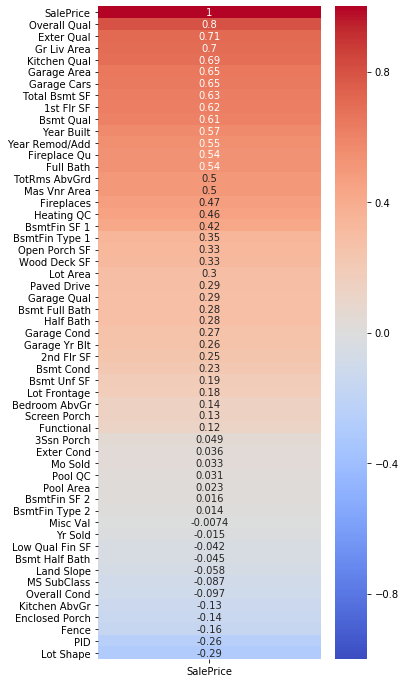

In [221]:
plt.figure(figsize = (5, 12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), 
            vmin = -1, 
            vmax = 1, 
            cmap = 'coolwarm', 
            annot = True);

_Chart 1:_
Heatmap to show correlation between Sale Price and other variables from the train dataset. 

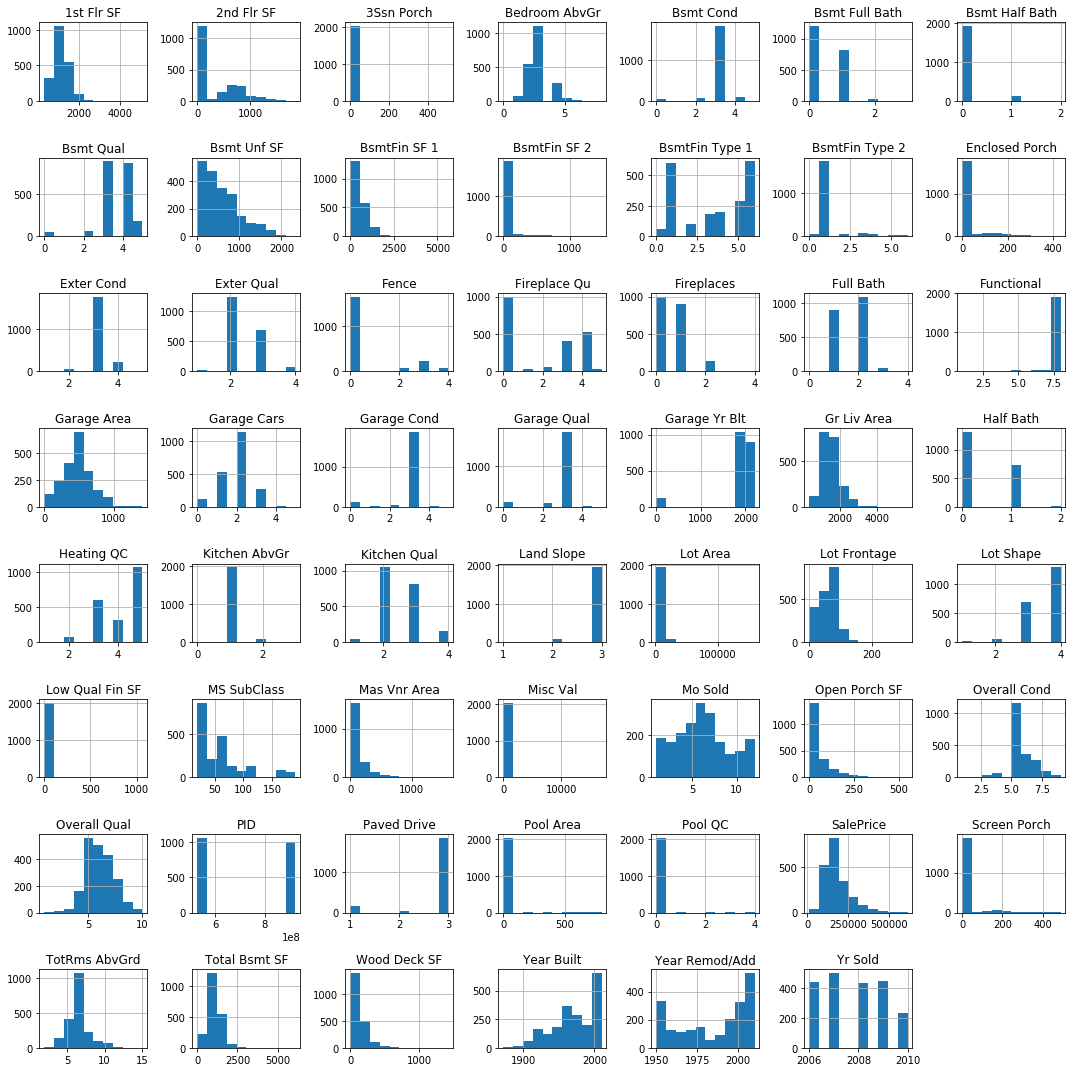

In [222]:
train.hist(figsize=(15, 15))
plt.tight_layout();

- Histograms showing the relationship between all variables in train dataset and sale price. Closer analysis is done with scatterplots and boxplots below for normal and skewed distributions.

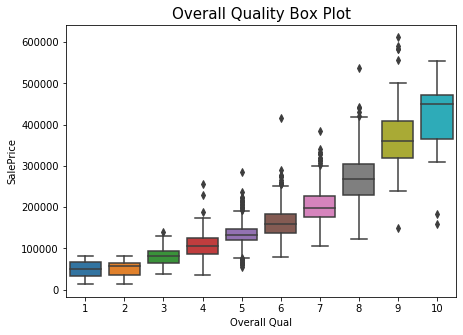

In [223]:
plt.figure(figsize = (7,5))
plt.title('Overall Quality Box Plot', fontsize = 15)
sns.boxplot(train['Overall Qual'], train['SalePrice']);

_Chart 2:_ 
The higher the overall quality (overall material and finish of the house), the higher the price range.

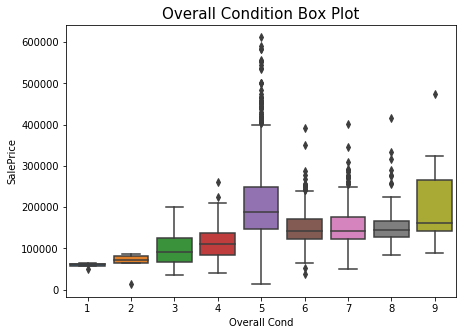

In [224]:
plt.figure(figsize = (7,5))
plt.title('Overall Condition Box Plot', fontsize = 15)
sns.boxplot(train['Overall Cond'], train['SalePrice']);

_Chart 3:_ 
There isn't a strong spread in sale price based on the overall condition of the house as the higher the rating is, the median across all ranks falls roughly within the same range. 

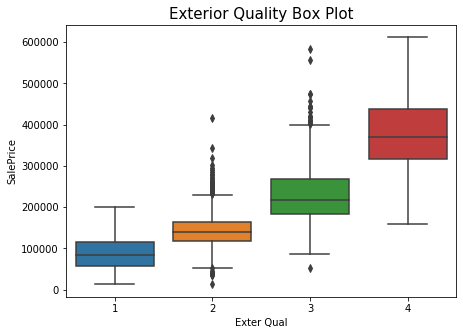

In [225]:
plt.figure(figsize = (7,5))
plt.title('Exterior Quality Box Plot', fontsize = 15)
sns.boxplot(train['Exter Qual'], train['SalePrice']);

_Chart 4:_ 
The higher the exterior quality (exterior material quality of the house), the higher the price range, which shows that there is somewhat of an effect on price based on the rating of the exterior quality. 

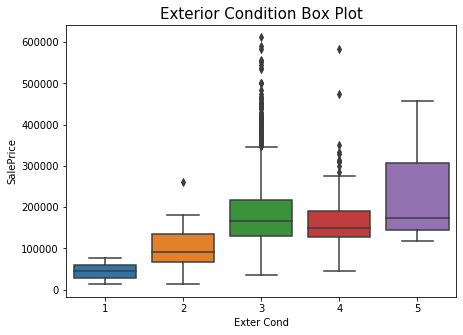

In [226]:
plt.figure(figsize = (7,5))
plt.title('Exterior Condition Box Plot', fontsize = 15)
sns.boxplot(train['Exter Cond'], train['SalePrice']);

_Chart 5:_ 
There isn't a strong spread in sale price based on the exterior condition of the house, similar to overall condition, as the higher the rating is, the median across all ranks falls roughly within the same range. 

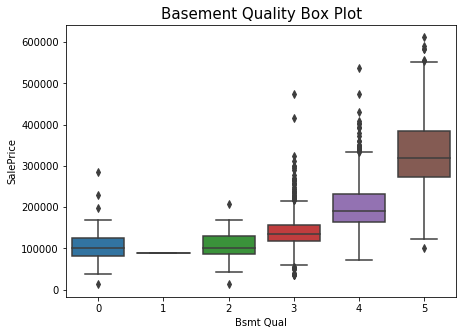

In [227]:
plt.figure(figsize = (7,5))
plt.title('Basement Quality Box Plot', fontsize = 15)
sns.boxplot(train['Bsmt Qual'], train['SalePrice']);

_Chart 6:_ 
There is a slight increase in sale price as the basement quality increases; however, there is a general equal price range for the lower qualities. 

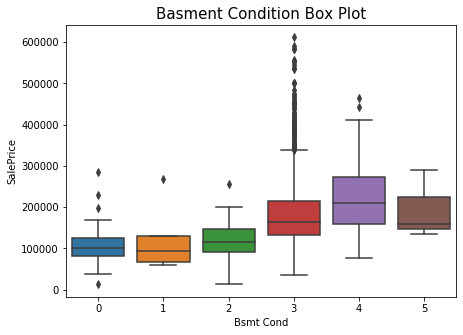

In [228]:
plt.figure(figsize = (7,5))
plt.title('Basment Condition Box Plot', fontsize = 15)
sns.boxplot(train['Bsmt Cond'], train['SalePrice']);

_Chart 7:_ 
There isn't a strong spread in sale price based on the basement condition of the house, similar to the other conditions, as the higher the rating is, the median across all ranks falls roughly within the same range. 

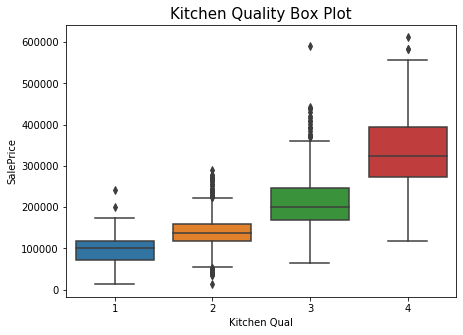

In [229]:
plt.figure(figsize = (7,5))
plt.title('Kitchen Quality Box Plot', fontsize = 15)
sns.boxplot(train['Kitchen Qual'], train['SalePrice']);

_Chart 8:_ 
There is a slight increase in sale price as the kitchen quality increases.

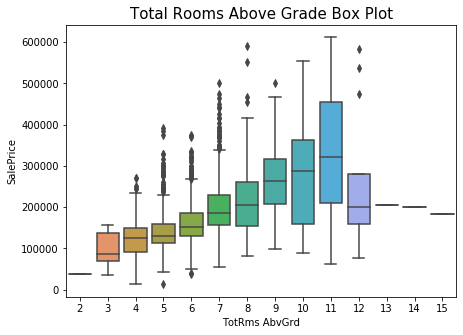

In [230]:
plt.figure(figsize = (7,5))
plt.title('Total Rooms Above Grade Box Plot', fontsize = 15)
sns.boxplot(train['TotRms AbvGrd'], train['SalePrice']);

_Chart 9:_ 
There is a slight increase in sale price as the total rooms above grade increases; however, there is a peark that is reached as shown by 11 rooms, where suddently there is a drop in the mean and IQR in 12+ rooms. 

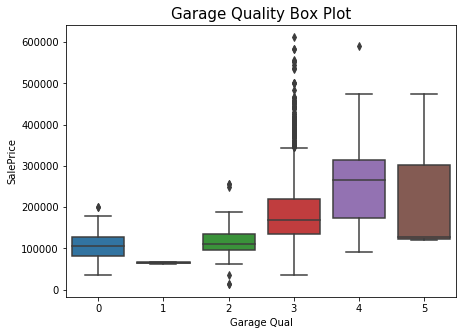

In [231]:
plt.figure(figsize = (7,5))
plt.title('Garage Quality Box Plot', fontsize = 15)
sns.boxplot(train['Garage Qual'], train['SalePrice']);

_Chart 10:_ 
There is a slight increase in sale price as the garage quality increases; however, does seem to be a sudden change in the highest quality as the mean sale price drops significantly compared to rankings of 3 and 4.

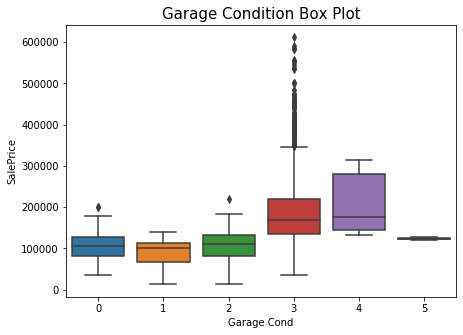

In [232]:
plt.figure(figsize = (7,5))
plt.title('Garage Condition Box Plot', fontsize = 15)
sns.boxplot(train['Garage Cond'], train['SalePrice']);

_Chart 11:_ 
There isn't a strong spread in sale price based on the garage condition of the house, similar to the other conditions, as the higher the rating is, the median across all ranks falls roughly within the same range. 

---
The following code blocks show group scatter plots showing the relationship between continuous variables and sale price. 

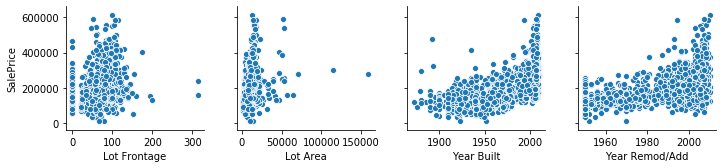

In [233]:
sns.pairplot(train, 
             x_vars = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add'], 
             y_vars = ['SalePrice']);

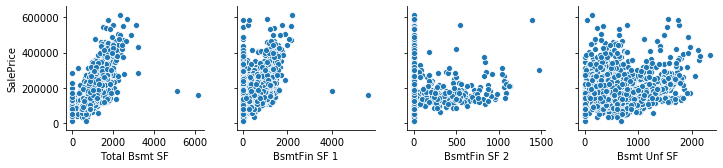

In [234]:
sns.pairplot(train, 
             x_vars = ['Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], 
             y_vars = ['SalePrice']);

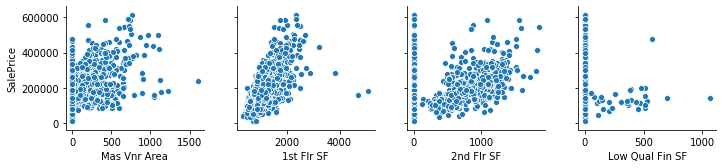

In [235]:
sns.pairplot(train, 
             x_vars = ['Mas Vnr Area','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], 
             y_vars = ['SalePrice']);

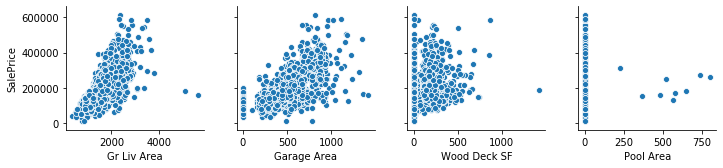

In [236]:
sns.pairplot(train, 
             x_vars = ['Gr Liv Area', 'Garage Area','Wood Deck SF', 'Pool Area'], 
             y_vars = ['SalePrice']);

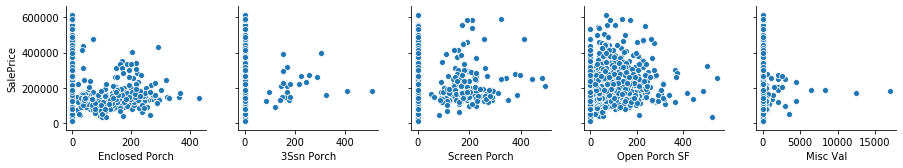

In [237]:
sns.pairplot(train, 
             x_vars = ['Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Open Porch SF', 'Misc Val'], 
             y_vars = ['SalePrice'])

Further analysis is done with standout graphs with a linear regression line below. 

---

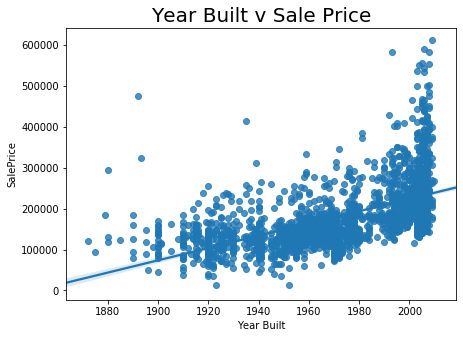

In [238]:
plt.figure(figsize = (7,5))
plt.title('Year Built v Sale Price', fontsize = 20)
sns.regplot(train['Year Built'], train['SalePrice']);

_Chart 12:_ 
The correlation between when a house was built against sale price is shown above, where a sudden increase in price is seen in more recently built houses while in earlier houses, there is a strong positive correlation with a few outliers. 

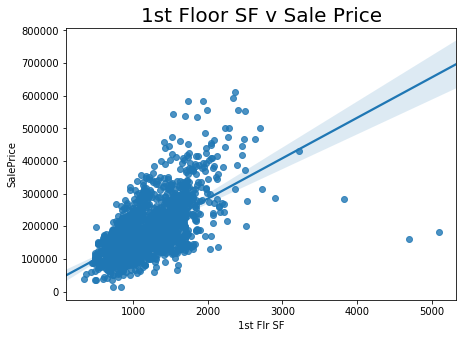

In [239]:
plt.figure(figsize = (7,5))
plt.title('1st Floor SF v Sale Price', fontsize = 20)
sns.regplot(train['1st Flr SF'], train['SalePrice'])

_Chart 13:_ 
The correlation between total square footage on the 1st floor of a house against sale price is shown above, where there is a heavy concentration in the bottom left part of the graph showing that prices generally fell in the same range for the same amount of square footage, but it also shows that there aren't many houses that had more than about 2000 square feet on the first floor. 

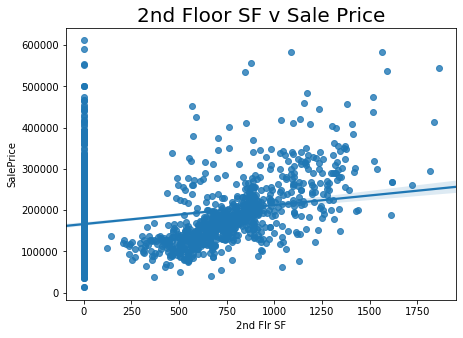

In [240]:
plt.figure(figsize = (7,5))
plt.title('2nd Floor SF v Sale Price', fontsize = 20)
sns.regplot(train['2nd Flr SF'], train['SalePrice']);

_Chart 14:_ 
The correlation between total square footage on the 2nd floor of a house against sale price is shown above, where there does seem to be a moderately strong positive correlation while ignoring the houses that did not have a second floor. There does seem to be another aspect that may affect why some of the prices jump more than others. 

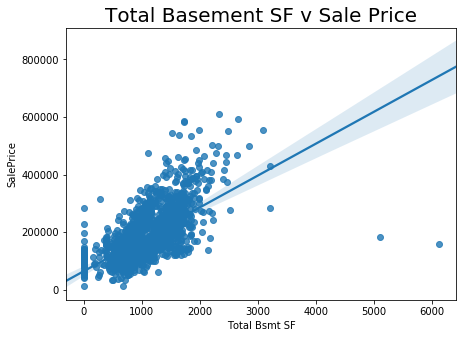

In [241]:
plt.figure(figsize = (7,5))
plt.title('Total Basement SF v Sale Price', fontsize = 20)
sns.regplot(train['Total Bsmt SF'], train['SalePrice']);

_Chart 15:_ 
The correlation between total square footage of the basement of a house against sale price is shown above, where there is a heavy concentration in the bottom left part of the graph showing that prices generally fell in the same range for the same amount of square footage, but it also shows that there aren't many houses that had more than about 2000 square feet for the basement, similarly to the 1st floor square footage relationship. 

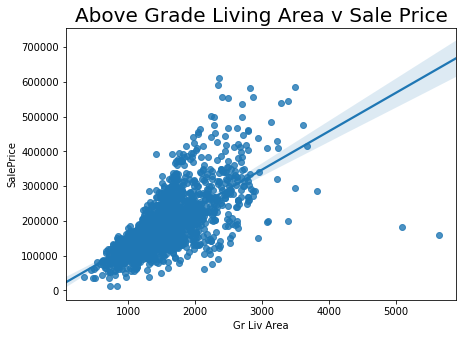

In [242]:
plt.figure(figsize = (7,5))
plt.title('Above Grade Living Area v Sale Price', fontsize = 20)
sns.regplot(train['Gr Liv Area'], train['SalePrice']);

_Chart 16:_
The correlation between above grade living area of a house against sale price is shown above, where there is a relatively strong positive correlation. 

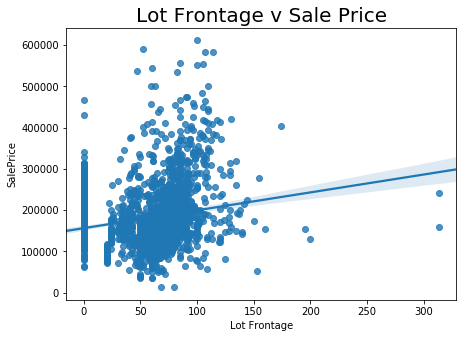

In [243]:
plt.figure(figsize = (7,5))
plt.title('Lot Frontage v Sale Price', fontsize = 20)
sns.regplot(train['Lot Frontage'], train['SalePrice']);

_Chart 17:_
The correlation between lot frontage against sale price is shown above, where there is a concentration in the number of feet where the street is connected to the property with some minor outliers. There is a lot of variance, so other factors of the house may have contributed to the higher prices for houses with similar lot frontages. 

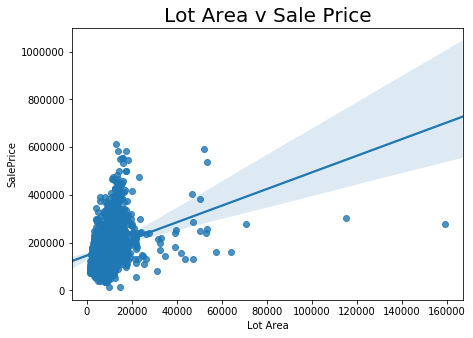

In [244]:
plt.figure(figsize = (7,5))
plt.title('Lot Area v Sale Price', fontsize = 20)
sns.regplot(train['Lot Area'], train['SalePrice']);

_Chart 18:_The correlation between lot area against sale price is shown above, where there is a high concentration in the bottom left part of the graph which entails that lot area doesn't have a significant affect on price. All houses generally had the same price range; however, it is spread across a range of about 500,000, but we can see that houses that had higher lot areas, still feel around the same sale price.

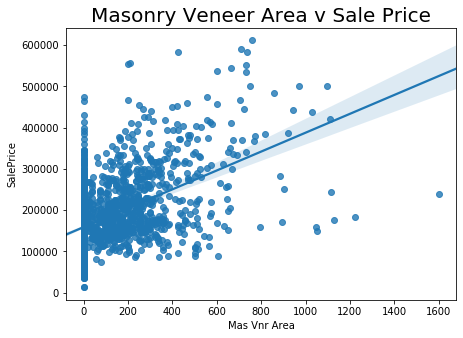

In [245]:
plt.figure(figsize = (7,5))
plt.title('Masonry Veneer Area v Sale Price', fontsize = 20)
sns.regplot(train['Mas Vnr Area'], train['SalePrice']);

_Chart 19:_
The correlation between masonry veneer area against sale price is shown above, where there is a noticeable concentration on teh left, but the variance is quite high which entails that the veneer area doesn't have a significant impact on sale price compared to other factors especially given the number of houses that have an area of 0, which tells that the house didn't even have a masonry.

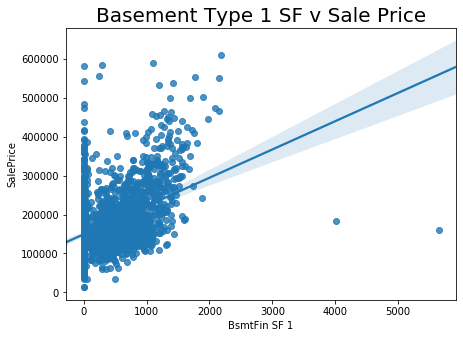

In [246]:
plt.figure(figsize = (7,5))
plt.title('Basement Type 1 SF v Sale Price', fontsize = 20)
sns.regplot(train['BsmtFin SF 1'], train['SalePrice']);

_Chart 20:_
The correlation between single type finished basement area against sale price is shown above, where there is a high concentration with high variance. There is a large number of houses that either may not have a basement or have a finished single type basement. However, the variance and outliers can show that this factor doesn't significantly impact price. 

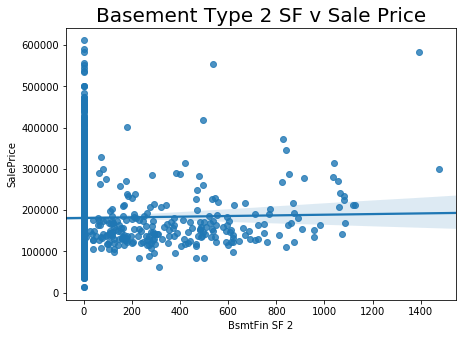

In [247]:
plt.figure(figsize = (7,5))
plt.title('Basement Type 2 SF v Sale Price', fontsize = 20)
sns.regplot(train['BsmtFin SF 2'], train['SalePrice']);

_Chart 21:_
The correlation between multi-type finished basement area against sale price is shown above, there is a variety of areas, however the price range is generally the same, so the size of the basement doesn't seem to yield a high impact on sale price. 

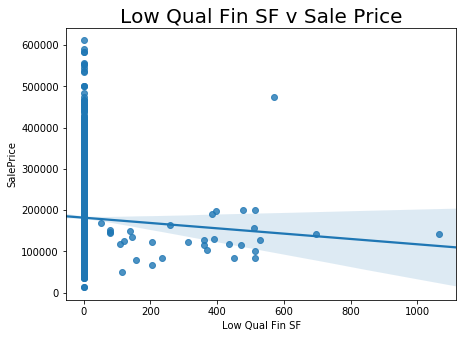

In [248]:
plt.figure(figsize = (7,5))
plt.title('Low Qual Fin SF v Sale Price', fontsize = 20)
sns.regplot(train['Low Qual Fin SF'], train['SalePrice']);

_Chart 22:_
The correlation between low quality finished floors against sale price is shown above, where we can see that not a lot of houses had the floors finished (or redone) and the houses that did, there seems to be a negative correlation, so have a low quality floor finish seems to lower sale price, but there isn't any significant correlation between the two. 

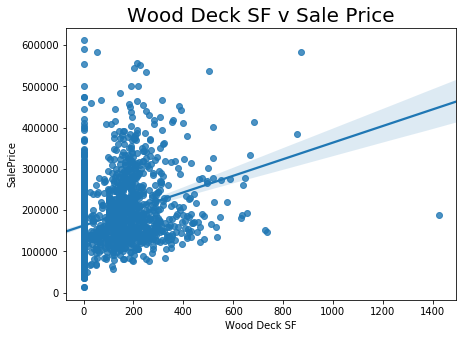

In [249]:
plt.figure(figsize = (7,5))
plt.title('Wood Deck SF v Sale Price', fontsize = 20)
sns.regplot(train['Wood Deck SF'], train['SalePrice']);

_Chart 23:_
The correlation between wood desk area in square feet against sale price is shown above, where there is a high concentration in the bottom left, as well as variance, but given the concentration of most of the houses, it can be inferred that wood deck doesn't have a strong impact on sale price as other factors may explain the higher prices for similar wood deck areas. 

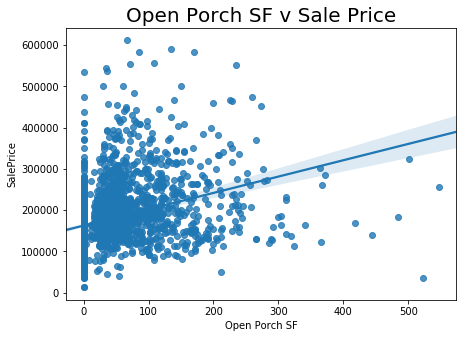

In [250]:
plt.figure(figsize = (7,5))
plt.title('Open Porch SF v Sale Price', fontsize = 20)
sns.regplot(train['Open Porch SF'], train['SalePrice']);

_Chart 24:_ 
The correlation between open porch square footage against sale price is shown above, where there does seem to be a slight linear increase in the data points showing a positive correlation; however, sale price tends to fall within a similar range despite a house having five times more square footage than another. 

### Visualization Notes
- Overall thoughts based on the visualizations, categories regarding house quality have a higher impact on sale price than categories regarding house condition. 
- The year built and sale price relationship tends to have more of an exponential relationship due to the more wide spread prices in newer houses. 
- The total square footage for the 1st floor and basement of houses seems to be relatively in the same area across houses; however, there is more variance for houses that have a 2nd floor and the affect the square footage has on price. 

### Dropping Outliers 
Here we dropped outliers based on the scatter plots from above to decrease the amount of variance from stand out plots. Notice that the code only applies to the train dataset as we want to manipulate the training data to create a model that will work well in predicting sale price with the test dataset.

In [251]:
saleprice_outliers = train[train['SalePrice'] > 500_000].index
train.drop(saleprice_outliers, inplace = True)

In [252]:
first_fl_sf_outliers = train[train['1st Flr SF'] > 5_000].index
train.drop(first_fl_sf_outliers, inplace = True)

In [253]:
first_fl_sf_outliers = train[train['2nd Flr SF'] > 1500].index
train.drop(first_fl_sf_outliers, inplace = True)

In [254]:
first_fl_sf_outliers = train[train['Total Bsmt SF'] > 4_000].index
train.drop(first_fl_sf_outliers, inplace = True)

In [255]:
grd_liv_outliers = train[train['Gr Liv Area'] > 3500].index
train.drop(grd_liv_outliers, inplace = True)

In [256]:
lot_front_outliers = train[train['Lot Frontage'] > 250].index
train.drop(lot_front_outliers, inplace = True)

In [257]:
lot_area_outliers = train[train['Lot Area'] > 100_00].index
train.drop(lot_area_outliers, inplace = True)

In [258]:
mas_vnr_outliers = train[train['Mas Vnr Area'] > 1400].index
train.drop(mas_vnr_outliers, inplace = True)

In [259]:
bsmtfin1_outliers = train[train['BsmtFin SF 1'] > 3000].index
train.drop(bsmtfin1_outliers, inplace = True)

In [260]:
bsmtfin2_outliers = train[train['BsmtFin SF 2'] > 1400].index
train.drop(bsmtfin2_outliers, inplace = True)

In [261]:
low_qualfin_outliers = train[train['Low Qual Fin SF'] > 800].index
train.drop(low_qualfin_outliers, inplace = True)

In [262]:
wood_deck_outliers = train[train['Wood Deck SF'] > 1200].index
train.drop(wood_deck_outliers, inplace = True)

In [263]:
open_porch_outliers = train[train['Open Porch SF'] > 500].index
train.drop(open_porch_outliers, inplace = True)

## Feature Engineering

In [264]:
# Create a column that tells us the total area of the house with other features such as
# garage and pool area too. 
train['Total Area'] = train['Lot Area'] + train['Mas Vnr Area'] + train['Total Bsmt SF'] + train['1st Flr SF'] + train['2nd Flr SF'] + train['Gr Liv Area'] + train['Garage Area'] + train['Wood Deck SF'] + train['Open Porch SF'] + train['Pool Area']
test['Total Area'] = test['Lot Area'] + test['Mas Vnr Area'] + test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF'] + test['Gr Liv Area'] + test['Garage Area'] + test['Wood Deck SF'] + test['Open Porch SF'] + test['Pool Area']

In [265]:
# Create a column that tells us the total house area without other features
train['House Area'] = train['1st Flr SF'] + train['2nd Flr SF'] + train['Total Bsmt SF']
test['House Area'] = test['1st Flr SF'] + test['2nd Flr SF'] + test['Total Bsmt SF']

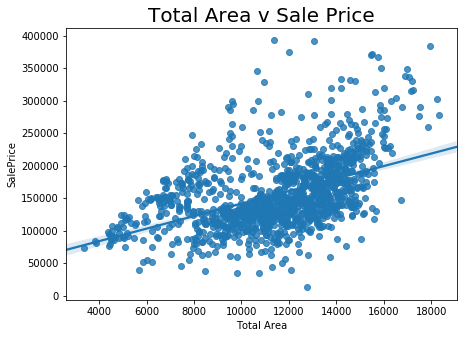

In [266]:
plt.figure(figsize = (7,5))
plt.title('Total Area v Sale Price', fontsize = 20)
sns.regplot(train['Total Area'], train['SalePrice']);

_Chart 25:_
The correlation between total property area of a house against sale price is shown above, where there is a relatively strong positive correlation, but high variance. 

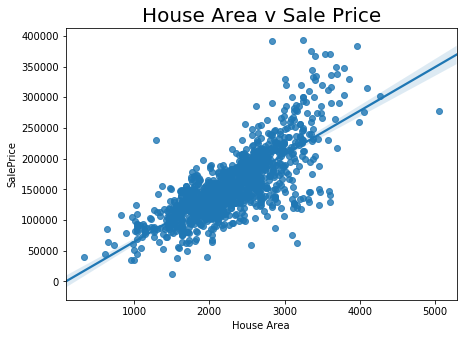

In [267]:
plt.figure(figsize = (7,5))
plt.title('House Area v Sale Price', fontsize = 20)
sns.regplot(train['House Area'], train['SalePrice']);

_Chart 26:_
The correlation between total area of a house against sale price is shown above, where there is a relatively strong positive correlation.

### Converting Categorical Data 

Note: Based on the data description, we dummied all the columns that had categorical data so yield numerical (binary) data. 

In [155]:
columns_to_dummy = ['MS Zoning', 'Street', 'Alley', 
                    'Land Contour', 'Utilities', 'Lot Config', 
                    'Neighborhood', 'Condition 1', 'Condition 2', 
                    'Bldg Type', 'House Style', 'Roof Style', 
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                    'Mas Vnr Type', 'Foundation', 'Heating', 
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']

In [156]:
train = pd.get_dummies(data = train, columns = columns_to_dummy)
test = pd.get_dummies(data = test, columns = columns_to_dummy)

In [157]:
train.shape

(1195, 207)

In [158]:
test.shape

(878, 212)

The train and test dataframes have a greater difference in columns now due to the dummy column process. Since there are less rows in the test dataframe than the train dataframe, there could have been values in some columns that only appeared in the train dataframe. We will tackle this problem and resolve it in our preprocessing. 

## Preprocessing and Modeling

In [159]:
# Determine any nonsimilar dummy columns
test_missing_cols = set(train) - set(test)

In [160]:
train_missing_cols = set(test) - set(train)

In [161]:
# To reconcile missing columns before fitting data
for col in train_missing_cols:
    train[col] = 0

In [162]:
for col in test_missing_cols:
    test[col] = 0

In [163]:
# Check to see if columns are equal
train.shape

(1195, 222)

In [164]:
test.shape

(878, 222)

In [165]:
# Code from Despina
# To finish preprocessing when modeling with linear regression models, we want to drop the 
# first dummy column
for dummy in columns_to_dummy:
    dummy_list = [column for column in train.columns if dummy in column]
    train.drop(columns = dummy_list[0], inplace = True)
    test.drop(columns = dummy_list[0], inplace = True)

In [166]:
# Exclude any data types that are an object column 
train = train.select_dtypes(exclude = ['object'])
test = test.select_dtypes(exclude = ['object'])

### Linear Regression

In [167]:
# Adjust features from the baseline model that includes all possible features
features = ['Overall Qual', 'Exter Qual', 'Total Area', 'Gr Liv Area',
            'Year Built', 'House Area']

X = train[features]
y = train['SalePrice']

In [168]:
# Split adjusted data features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [169]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

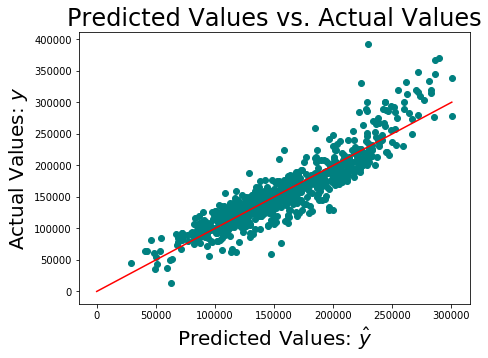

In [170]:
# Replot the model
plt.figure(figsize=(7,5))
plt.scatter(y_train_preds, y_train, color = 'teal')

plt.plot([0, np.max(y_train_preds)],
         [0, np.max(y_train_preds)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Linear Regression Notes

With the Base Linear Regression Model, where we factored in all column variables to predict sale price, it did quite well where as shown in the graph there is minimal variance. However, considering the more "heavy-weight" factors from my EDA, we decided to adjust my model as there may be future houses that may not have variables that my trained model has. 

So in my Adjusted Linear Regression Model, we factored in Overall Quality, Exterior Quality, Total Property Area, Above Grade Living Area, Year Built, and Total House Area to be our features when predicting Sale Price because they seem to yield high correlations from our EDA. We also included Total Property Area and Total House Area as new features that account for multiple columns as opposed to create a coefficient for each individual feature. 

- Overall, these factors are subjective and more general to cater to more houses that may not have factors such as a Garage or a Pool. 

While Linear Regression does prove to be useful in predicting y (in this case sale price) given X (in this case a set amount of features), there is the primary downfall of it being unbounded, which we can tackle through winsorizing later on. 

## Regularization
Here we fit the data to a different model to determine which model is best for predicting sale price based on the established features from the Linear Regression model. 

- We scale the data, then instantiate and fit our data to the Lasso and Ridge Linear Models

### Scaling Data

In [171]:
# Adjusting features to follow the baseline model that includes all possible features
features = train.drop(columns = ['SalePrice', 'PID', 'Kitchen Qual', 'Functional']).columns

X2 = train[features]
y2 = train['SalePrice']

In [172]:
# Split data features
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [173]:
#Instantiate the model 
ss = StandardScaler()

In [174]:
# Fit the model 
ss.fit(X_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [175]:
# Scale
Z_train = ss.transform(X_train2)
Z_test = ss.transform(X_test2)

### Ridge Regression 

In [176]:
# Instantiate the cross validation model 
ridge_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas = ridge_alphas, 
                scoring = 'r2', 
                cv = 5)

In [177]:
# Fit the model 
ridge_cv.fit(Z_train, y_train2);

In [178]:
# Find ideal alpha
ridge_a = ridge_cv.alpha_

In [179]:
# Instantiate and fit Ridge model 
ridge = Ridge(alpha = ridge_a)
ridge.fit(Z_train, y_train2);

In [180]:
# Predict y-values
y_train_preds3 = ridge.predict(Z_train)
y_test_preds3 = ridge.predict(Z_test)

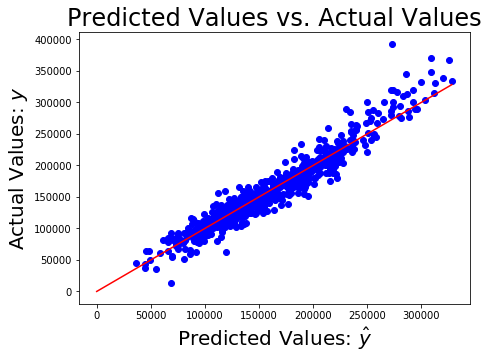

In [181]:
# Plot 
plt.figure(figsize=(7, 5))
plt.scatter(y_train_preds3, y_train2, color = 'blue')

plt.plot([0, np.max(y_train_preds3)],
         [0, np.max(y_train_preds3)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Ridge Notes
Similar to the Linear Regression Model, we factored in Overall Quality, Exterior Quality, Total Property Area, Above Grade Living Area, Year Built, and Total House Area to be our features when predicting Sale Price. With Ridge Regression, we add the sum of squared $\beta$ coefficients to the SSE, our loss function. 
While Lasso Regression does prove to be useful in predicting y (in this case sale price) given X (in this case a set amount of features) with regulation, $\alpha$, there is the primary downfall of it being unbounded, which we can tackle through winsorizing later on. 

### Lasso Regression 

In [182]:
# Instantiate the cross validation model 
lasso_alphas = [50, 100, 150]
lasso_cv = LassoCV(alphas = lasso_alphas, 
                cv = 5, 
                max_iter = 10000)

In [183]:
# Fit the model 
lasso_cv.fit(Z_train, y_train2);

In [184]:
# Find ideal alpha
lasso_a = lasso_cv.alpha_

In [185]:
#Instantiate and fit the Lasso model
lasso = Lasso(alpha = lasso_a)
lasso.fit(Z_train, y_train2);

In [186]:
# Predict y-values 
y_train_preds2 = lasso.predict(Z_train)
y_test_preds2 = lasso.predict(Z_test)

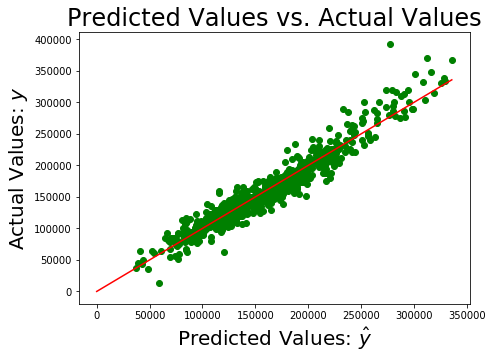

In [187]:
# Plot 
plt.figure(figsize=(7, 5))
plt.scatter(y_train_preds2, y_train2, color = 'green')

plt.plot([0, np.max(y_train_preds2)],
         [0, np.max(y_train_preds2)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Lasso Notes
Similar to the Linear Regression Model, we factored in Overall Quality, Exterior Quality, Total Property Area, Above Grade Living Area, Year Built, and Total House Area to be our features when predicting Sale Price. Instead of adding the sum of squared $\beta$ coefficients to the SSE, our loss function, it adds the sum of the absolute values of the $\beta$ coefficients. 

While Lasso Regression does prove to be useful in predicting y (in this case sale price) given X (in this case a set amount of features) with regulation, $\alpha$, there is the primary downfall of it being unbounded, which we can tackle through winsorizing later on. 

## Winsorizing Models
Here we tackle on the downfall of regression models: lack of boundaries. Our regression models do well in predicting sale price when given a certain amount of features, but the predictions are unbounded. So it can predict sale prices from $-\infty$ to $\infty$ and it doesn't make sense to pay a negative amount of money when purchasing a house. Therefore, we can create a lower boundary through winsorizing. 

In [188]:
# Defining a function for winsorizing our predictions
def winsorize(predictions):
    winsorized_preds = []
    
    fifth_p = np.quantile(predictions, 0.05)
    
    for pred in predictions:
        if pred < fifth_p:
            winsorized_preds.append(fifth_p)
        else:
            winsorized_preds.append(pred)

    return winsorized_preds

### Winsorize Linear Regression

In [189]:
lr_winsorized_preds = winsorize(y_train_preds)

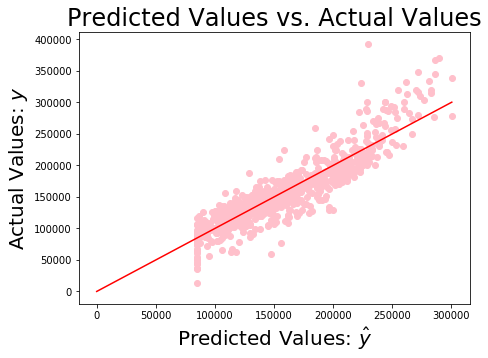

In [190]:
# Plot 
plt.figure(figsize=(7, 5))
plt.scatter(lr_winsorized_preds, y_train, color = 'pink')

plt.plot([0, np.max(lr_winsorized_preds)],
         [0, np.max(lr_winsorized_preds)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Winsorize Ridge Regression

In [191]:
ridge_winsorized_preds = winsorize(y_train_preds3)

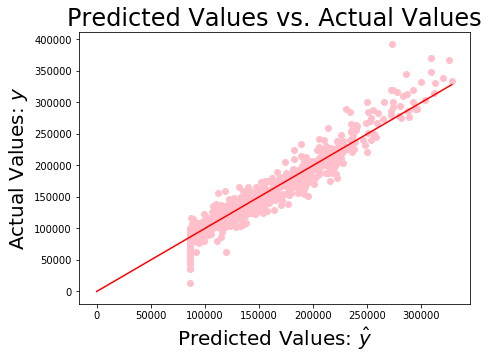

In [192]:
# Plot 
plt.figure(figsize=(7, 5))
plt.scatter(ridge_winsorized_preds, y_train, color = 'pink')

plt.plot([0, np.max(ridge_winsorized_preds)],
         [0, np.max(ridge_winsorized_preds)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Winsorize Lasso Regression

In [193]:
lasso_winsorized_preds = winsorize(y_train_preds2)

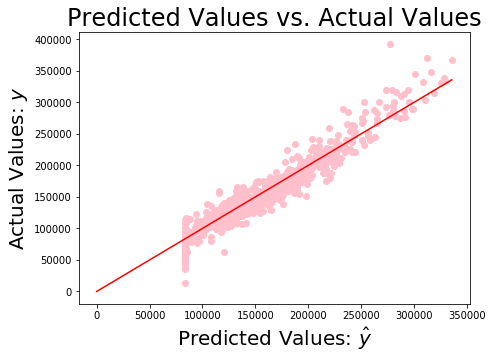

In [194]:
# Plot 
plt.figure(figsize=(7, 5))
plt.scatter(lasso_winsorized_preds, y_train, color = 'pink')

plt.plot([0, np.max(lasso_winsorized_preds)],
         [0, np.max(lasso_winsorized_preds)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Winsorized Regression Models Notes
As seen from the calculations and models above. When we winsorize our regression models we create a lower boundary at the fifth percentile of our predictions so that in case there are any outstanding outliers that may pull housing prices to become suspiciously low, we force it to become the fifth percentile price. 

## Model Scoring

In [195]:
# Baseline scoring
y_bar = np.mean(y)
y_preds_baseline = [y_bar for i in y]
r2_score(y, y_preds_baseline)

0.0

Since baseline model should predict the mean outcome value for a regression problem and we are setting our predictions to be equal to the actual mean of y, when we follow the formula for getting $R^2$ our predicted values and true values are equal so when we divide them, we get one and completing the rest of the formula is to subtract our predicted values divided by actual values from one; so, we get a baseline score of zero. 

### Linear Regression Scoring

In [196]:
# Train scoring 
lr.score(X_train, y_train)

0.8240791516449083

In [197]:
# Test scoring
lr.score(X_test, y_test)

0.7930652155772504

In [198]:
# Cross val scoring
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.8203915342721675

Linear Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.8241, which means that 82.41% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.7931, which means that 79.31% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

In [199]:
# Scoring based on Root Mean Squared Error metric: 
def RMSE(true_values, predicted_values): 
    mean_se = np.mean((true_values - predicted_values) ** 2)
    root_mean = mean_se ** 0.5
    return root_mean

In [200]:
# Baseline 
RMSE(y, y_preds_baseline)

54662.536569831616

In [201]:
# Train dataset
RMSE(y_train, y_train_preds)

22654.405108643354

In [202]:
# Test dataset
RMSE(y_test, y_test_preds)

25536.155708393482

Root Mean Squared Error Metric Score Comparison: Similarly to the $R^2$ metric, the model does quite well with the training dataset and significantly better than the baseline model. The baseline yields a RMSE of approximately 55,000 dollars. The training dataset yields a RMSE of approximately 22,600 dollars, which signifies the average of all differences between the predicted and true sale prices. Similarly, the testing dataset yields a RMSE of approximately 25,500 dollars, which that the model still does fairly well with predicting sale prices for new data, but there is slightly a higher variance. Although the RMSE is higher for the testing dataset than the training dataset, the model still does pretty well when exposed to new data especially compared to the baseline. 

### Lasso Regression Scoring

In [203]:
# Train scoring 
lasso.score(Z_train, y_train2)

0.9272241070729121

In [204]:
# Test scoring 
lasso.score(Z_test, y_test2)

0.881586900486213

Lasso Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.9272, which means that 92.72% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.8816, which means that 88.16% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

Compared to the Linear Regression Scores, the Lasso Regression Scores are much better. We can see that the Lasso model do very on the training data and the testing data set where a lot more variance is accounted for. 

|Model|Train Score|Test Score|
|---|---|---|
|Linear Regression|0.8241|0.7931|
|Lasso Regression|0.9272|0.8816|

### Ridge Regression Scoring

In [205]:
# Train scoring 
ridge.score(Z_train, y_train2)

0.9228214204350483

In [206]:
# Test scoring 
ridge.score(Z_test, y_test)

0.88348780965239

Ridge Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.9228, which means that 92.28% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.8835, which means that 88.35% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

Compared to the other Regression Scores, the Ridge Regression Scores are better. Taking a closer look we can see that our ridge model does the best on testing data and also shows low variance. 

|Model|Train Score|Test Score|
|---|---|---|
|Linear Regression|0.8241|0.7931|
|Lasso Regression|0.9272|0.8816|
|Ridge Regression|0.9229|0.8835|

## Outside Research

<img src="../images/map.png" width="700px">

From the map of Ames, Iowa we can immediately see that Iowa State University is located here, which entails that a good amount of the population is probably college students. 

Upon further research, we discovered the following information about Ames, Iowa: 
- The median household income is 42,755 dollars (annually)
- The median property value is 187,000 dollars 
- The average male salary is 58,922 dollars (annually)
- The average female salary is 44,006 dollars (annually)

Buying a house also requires a substantial amount of funds ready for disposal especially with housing prices on the rise for not only Ames, Iowa, but across the country. When purchasing a house, we need to consider more than just the price of the house. 
- The down payment can range from 3.5% to 20% of the total cost of the home, depending on credit score, mortgage, interest rate, and finances. 
- Closing costs (inspection fees and property taxes) can range from 2% to 5% of the total cost of the home onto the final price. 

Furthermore, other factors can affect how much money is needed such as moving expenses, repair costs, and mortgage payments. 

<img src="../images/income map.png" width="700px">

Above, we have the income map of Ames, Iowa which shows us the breakdown of income levels across parts of Ames. From this we can infer that depending on where you decide to buy a house in the city can be impacted by the surrounding financial standing in a specific area. 

## Conclusion

In [207]:
# Code from Despina
# Create a variable that is an empty dataframe that will list features and our model coefficients
ridge_coef_df = pd.DataFrame({'Features': features,
                              'Coefficient' : ridge.coef_})

In [208]:
# Code from Despina
# Fill in our empty dataframe with the features of the house and the respective coefficient
# sorted from highest impact on sale price to lowest, but only show the top five
ridge_coef_df[ridge_coef_df['Coefficient'] > 0].sort_values(by = 'Coefficient', ascending = False).head()

,Features,Coefficient
5,Overall Qual,7937.406261
23,Gr Liv Area,5395.209048
51,House Area,4929.834224
10,Exter Qual,4439.570907
7,Year Built,4373.996825


Here we have the coefficients for the top five features that have the highest impact on sale price based on the Ridge Regression Model. We can interpret these numbers as follows: 

|Feature|Meaning|
|---|---|
|Overall Qual|For all else held equal, a one unit increase in overall quality yields a 7,937 increase in Sale Price|
|Gr Liv Area|For all else held equal, a one unit increase in above grade living area yields a 5,395 increase in Sale Price| 
|House Area|For all else held equal, a one unit increase in total house area yields a 4,929 increase in Sale Price| 
|1st Flr SF|For all else held equal, a one unit increase in the first floor square footage yields a 4,439 increase in Sale Price| 
|Year Built|For all else held equal, a one unit increase in the year built yields a 4,373 increase in Sale Price| 

Through our data analysis, all three regression models do quite well but our Ridge Regression Model is our best option. Based on our $R^2$ scores for our train and test datasets, the values tell us that the model does very well in predicting the sale price when looking at all the features possible on data that it has been exposed to and trained on; and the model does well in predicting the sale price when exposed to data that is new. 

However, our models aren't perfect because there are so many other factors involved that can't be easily written in as data. As discovered from outside research, there could be outside factors of the location that affect the housing price. Deciding on whether you want to buy a house buy the university or away from the university can impact the price. Furthermore, gender could come into play if you're looking to be the sole owner as there's approximately a 15,000 dollar difference in annual salary between men and women; thus, it could be harder for a woman to afford a new house than a man. In addition, personal preferences can affect how much money will be needed overall such as moving expenses and repair costs. 

Overall, our Ridge Regression Model is quite accurate in predicting the sale price of a house in Ames, Iowa given numerous features of the house and then you can tack on a a couple hundred or thousand dollars to account for personal or outside factors. For the time being, when looking at buying a house in Ames look at the following features first because they have the highest impact on sale price: 
- Overall Quality 
- Above Grade Living Area
- House Area
- First Floor Square Footage
- Year Built

Until the model can be refined with more features taken into consideration such as personal and outside factors, referring to the model and specific features when looking at the house are ideal. To calculate how much you would need in total, do a personal calculation of how much a moving truck would cost and the cost for parts of the house you would like to be repaired, rennovated, or installed. 

### Kaggle Predictions

In [209]:
train.shape

(1195, 197)

In [210]:
test.shape

(878, 195)

In [211]:
X_kaggle = test[features]

In [212]:
ss.fit(X_kaggle)
Z_kaggle = ss.transform(X_kaggle)

In [213]:
preds_kaggle = ridge.predict(Z_kaggle)

In [214]:
X_kaggle['SalePrice'] = preds_kaggle

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [215]:
X_kaggle.head()

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Condition 2_PosA,Exterior 2nd_Other,Roof Matl_Metal,Condition 1_PosA,MS Zoning_I (all),Exterior 2nd_AsphShn,Exterior 2nd_PreCast,Exterior 1st_AsphShn,Mas Vnr Type_CBlock,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,69.0,9142,4,3,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,112208.756818
2718,90,0.0,9662,3,3,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,134350.827590
2414,60,58.0,17104,3,3,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,194791.703042
1989,30,60.0,8520,4,3,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,99351.667779
625,20,0.0,9500,3,3,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,159231.404964


In [216]:
predictions = X_kaggle[['SalePrice']]

In [217]:
#predictions.to_csv('../submissions/fifteenth_submission.csv')

## Sources
- [Ames, Iowa](https://datausa.io/profile/geo/ames-ia/)
- [Buying a House](https://www.cnbc.com/2018/04/05/how-much-you-need-to-save-to-afford-to-buy-a-home.html)